In [1]:
%pylab inline
import matplotlib as mpl
from pygadgetreader import *
from mpl_toolkits.mplot3d import Axes3D


Populating the interactive namespace from numpy and matplotlib


In [2]:
font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

In [13]:
# Function that reads the data from the Analytic integration
#Galactocentic distances and velocities
def reading_data(snap_name):
    host = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_host.txt')
    sat = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_sat.txt')
    t = host[:,0] 
    # Defining galactocentric distances and velocities
    x = sat[:,1] - host[:,1] 
    y = sat[:,2] - host[:,2] 
    z = sat[:,3] - host[:,3] 

    vx = sat[:,4] - host[:,4] 
    vy = sat[:,5] - host[:,5] 
    vz = sat[:,6] - host[:,6]        

    Rgal = np.sqrt(x**2.0 + y**2.0 + z**2.0)
    Vgal = np.sqrt(vx**2.0 + vy**2.0 + vz**2.0)
    
    return t, x, y, z, vx, vy, vz, Rgal, Vgal

# Host coordinates and velocities
def data_host(snap_name):
    host = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_host.txt')
    return host[:,1], host[:,2], host[:,3], host[:,4], host[:,5], host[:,6]

# Satellite coordinates and velocities
def data_sat(snap_name):
    sat = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_sat.txt')
    return sat[:,1], sat[:,2], sat[:,3], sat[:,4], sat[:,5], sat[:,6]

#ICs
def ICs(Rgal, cut, x, y, z, vx, vy, vz, t):
    Rcut = np.where(Rgal>=cut)[0]
    return Rgal[Rcut[0]], x[Rcut[0]], y[Rcut[0]], z[Rcut[0]], vx[Rcut[0]], vy[Rcut[0]], vz[Rcut[0]], t[Rcut[0]]

#Function that reads the N-body sumulation orbit
def reading_Nbody(snap_name):
    data = np.loadtxt('orbits/' + snap_name)
    time = data[:,0]
    Rgal = data[:,1]
    x_sat= data[:,2]
    y_sat = data[:,3]
    z_sat = data[:,4]
    x_gal = data[:,5]
    y_gal = data[:,6]
    z_gal = data[:,7]
    Vgal = data[:,8]
    vx_sat = data[:,9]
    vy_sat = data[:,10]
    vz_sat = data[:,11]
    vx_gal = data[:,12]
    vy_gal = data[:,13]
    vz_gal = data[:,14]
    return time, Rgal, x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal

def best_values(x, y, z, vx, vy, vz):
    x_obs = -1
    y_obs = -41
    z_obs = -28
    vx_obs = -57
    vy_obs = -226
    vz_obs = 221
    Robs = np.sqrt((x_obs-x)**2.0 + (y_obs-y)**2.0 + (z_obs-z)**2.0)
    index = np.where(Robs == min(Robs))[0]
    print 'obs:', x_obs, y_obs, z_obs, vx_obs, vy_obs, vz_obs
    return x[index], y[index], z[index], vx[index], vy[index], vz[index]

In [ ]:
#

In [7]:
tgal1, xgal1, ygal1, zgal1, vxgal1, vygal1, vzgal1, Rgal1, Vgal1 = reading_data('lmc5_MWHern1')
tNB, RgalNB, xsatNB, ysatNB, zsatNB, xgalNB, ygalNB, zgalNB, vgalNB, vxsatNB,\
vysatNB, vzsatNB, vxgalNB, vygalNB, vzgalNB = reading_Nbody('LMC5_H0.txt')

In [8]:
ric1, xic1, yic1, zic1, vxic1, vyic1, vzic1, tic1 = ICs(Rgal1, 280, xgal1, ygal1, zgal1, vxgal1, vygal1, vzgal1, tgal1)

In [9]:
RgNB = np.sqrt((xgalNB-xsatNB)**2.0 + (ygalNB - ysatNB)**2.0 + (zgalNB-zsatNB)**2.0)

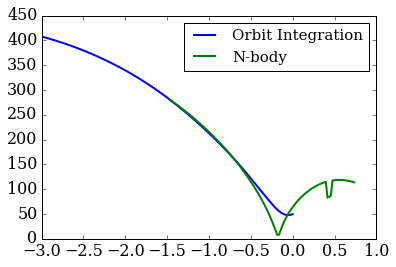

In [13]:
plot(tgal1, Rgal1, lw=2, label='Orbit Integration')
plot(tNB+tic1, RgNB, lw=2, label='N-body')
legend(fontsize=15)

In [14]:
print 'ICs for analytic iteration to match the Nbody orbit with differentd dfs:'
print 'x:', xsatNB[0]-xgalNB[0]
print 'y:', ysatNB[0]-ygalNB[0]
print 'z:', zsatNB[0]-zgalNB[0]

print 'vx:', vxsatNB[0]-vxgalNB[0]
print 'vy:', vysatNB[0]-vygalNB[0]
print 'vz:', vzsatNB[0]-vzgalNB[0]

ICs for analytic iteration to match the Nbody orbit with differentd dfs:
x: 29.368077
y: 277.531191
z: 24.414161
vx: -2.847878
vy: -120.557104
vz: -2.806147


In [13]:
print tNB[-1]

3.0


In [19]:
tgal05, xgal05, ygal05, zgal05, vxgal05, vygal05, vzgal05, Rgal05, Vgal05 = reading_data('lmc5_MWpmdf05')
tgal06, xgal06, ygal06, zgal06, vxgal06, vygal06, vzgal06, Rgal06, Vgal06 = reading_data('lmc5_MWpmdf06')
tgal07, xgal07, ygal07, zgal07, vxgal07, vygal07, vzgal07, Rgal07, Vgal07 = reading_data('lmc5_MWpmdf07')
#tgal15, xgal15, ygal15, zgal15, vxgal15, vygal15, vzgal15, Rgal15, Vgal15 = reading_data('lmc6_MWpmdf15')
#tgal18, xgal18, ygal18, zgal18, vxgal18, vygal18, vzgal18, Rgal18, Vgal18 = reading_data('lmc6_MWpmdf18')
#tgal20, xgal20, ygal20, zgal20, vxgal20, vygal20, vzgal20, Rgal20, Vgal20 = reading_data('lmc6_MWpmdf20')


(0, 300)

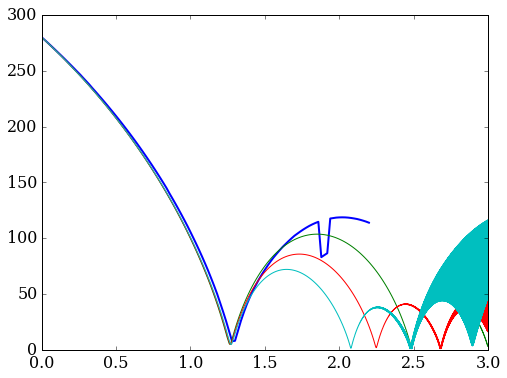

In [20]:
figure(figsize=(8, 6))
plot(tNB, RgNB, lw=2 )
plot(tgal05, Rgal05)
plot(tgal06, Rgal06)
plot(tgal07, Rgal07)
#plot(tgal15, Rgal15)
#plot(tgal18, Rgal18)
#plot(tgal20, Rgal20)
#xlim(0.0, 1.4)
ylim(0, 300)

In [23]:
tgal05b, xgal05b, ygal05b, zgal05b, vxgal05b, vygal05b, vzgal05b, Rgal05b, Vgal05b = reading_data('lmc5_MWpmdf05b')
tgal06b, xgal06b, ygal06b, zgal06b, vxgal06b, vygal06b, vzgal06b, Rgal06b, Vgal06b = reading_data('lmc5_MWpmdf06b')
tgal07b, xgal07b, ygal07b, zgal07b, vxgal07b, vygal07b, vzgal07b, Rgal07b, Vgal07b = reading_data('lmc5_MWpmdf07b')

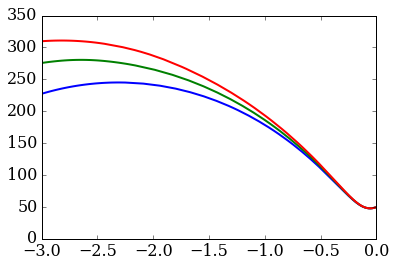

In [24]:
plot(tgal05b, Rgal05b, lw=2)
plot(tgal06b, Rgal06b, lw=2)
plot(tgal07b, Rgal07b, lw=2)

In [32]:
ric05, xic05, yic05, zic05, vxic05, vyic05, vzic05, tic05 = ICs(Rgal05b, 245,  xgal05b, ygal05b, zgal05b, vxgal05b, vygal05b, vzgal05b, tgal05b)
ric06, xic06, yic06, zic06, vxic06, vyic06, vzic06, tic06 = ICs(Rgal06b, 280,  xgal06b, ygal06b, zgal06b, vxgal06b, vygal06b, vzgal06b, tgal06b)
ric07, xic07, yic07, zic07, vxic07, vyic07, vzic07, tic07 = ICs(Rgal07b, 300,  xgal07b, ygal07b, zgal07b, vxgal07b, vygal07b, vzgal07b, tgal07b)

In [33]:
print xic05, yic05, zic05, vxic05, vyic05, vzic05
print xic06, yic06, zic06, vxic06, vyic06, vzic06
print xic07, yic07, zic07, vxic07, vyic07, vzic07

8.314183 211.882583 122.726527 14.090038 35.727729 -71.808439
9.687138 242.688659 139.347266 12.45876 27.174539 -67.321088
17.426144 277.400365 112.929638 9.150886 -10.993834 -76.248845


In [27]:
# Final Results from Nbody from aboce ICs
tNB1, RgalNB1, xsatNB1, ysatNB1, zsatNB1, xgalNB1, ygalNB1, zgalNB1, vgalNB1, vxsatNB1,\
vysatNB1, vzsatNB1, vxgalNB1, vygalNB1, vzgalNB1 = reading_Nbody('LMC5_H1.txt')

tNB2, RgalNB2, xsatNB2, ysatNB2, zsatNB2, xgalNB2, ygalNB2, zgalNB2, vgalNB2, vxsatNB2,\
vysatNB2, vzsatNB2, vxgalNB2, vygalNB2, vzgalNB2 = reading_Nbody('LMC5_H3.txt')

#tNB3, RgalNB3, xsatNB3, ysatNB3, zsatNB3, xgalNB3, ygalNB3, zgalNB3, vgalNB3, vxsatNB3,\
#vysatNB3, vzsatNB3, vxgalNB3, vygalNB3, vzgalNB3 = reading_Nbody('LMC5_H3.txt')

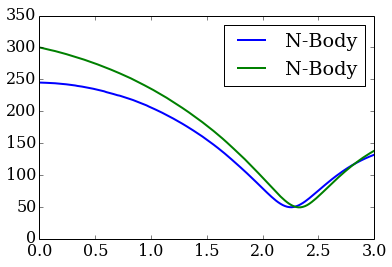

In [28]:
#plot(tgal05b, Rgal05b, lw=2, label='Analytic')
plot(tNB1, RgalNB1, lw=2, label='N-Body')
plot(tNB2, RgalNB2, lw=2, label='N-Body')
legend()

In [29]:
XNB1 =  xsatNB1 - xgalNB1
YNB1 =  ysatNB1 - ygalNB1
ZNB1 =  zsatNB1 - zgalNB1
vxNB1 = vxsatNB1 - vxgalNB1
vyNB1 = vysatNB1 - vygalNB1
vzNB1 = vzsatNB1 - vzgalNB1


XNB2 =  xsatNB2 - xgalNB2
YNB2 =  ysatNB2 - ygalNB2
ZNB2 =  zsatNB2 - zgalNB2
vxNB2 = vxsatNB2 - vxgalNB2
vyNB2 = vysatNB2 - vygalNB2
vzNB2 = vzsatNB2 - vzgalNB2

In [30]:
best_values(XNB1, YNB1, ZNB1, vxNB1, vyNB1, vzNB1)


obs: -1 -41 -28 -57 -226 221


(array([-0.793826]),
 array([-43.966995]),
 array([-28.284428]),
 array([-62.349816]),
 array([-239.110822]),
 array([ 225.077729]))

In [31]:
best_values(XNB2, YNB2, ZNB2, vxNB2, vyNB2, vzNB2)

obs: -1 -41 -28 -57 -226 221


(array([ 0.003023]),
 array([-40.724015]),
 array([-31.106848]),
 array([-67.262523]),
 array([-264.987876]),
 array([ 221.025256]))

In [28]:
snap_nuumber = np.where(YNB == -44.966176)[0]
print snap_nuumber

[119]
